<a href="https://colab.research.google.com/github/monsegutier/Grupo4-PP1--Proyecto-ML/blob/monse/Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Analisis DataSet - Heart Atack




## Descripcion caracteristicas

**Aim :** predecir el resultado de un ataque cardíaco

Features:

**Age :** Edad del paciente

**Sex :** Sexo del paciente.

**cp :** tipo de dolor en el pecho:

Valor 0: angina típica

Valor 1: angina atípica

Valor 2: dolor no anginoso

Valor 3: asintomático


**trtbps :** presión arterial en reposo (en mm Hg)

**chol :** colesterol en mg/dl obtenido mediante el sensor de IMC

**fbs :** (azúcar en sangre en ayunas > 120 mg/dl)

1 = verdadero

0 = falso

**rest_ecg :** resultados electrocardiográficos en reposo:

Valor 0: normal

Valor 1: tener anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)

Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes

**thalach :** frecuencia cardíaca máxima alcanzada.

**exang :** angina inducida por el ejercicio:

1 = si

0 = no

**oldpeak :** depresión del ST inducida por el ejercicio en relación con el reposo.

Depresión del ST: un tipo de anomalía del segmento ST. El segmento ST es la parte plana e isoeléctrica del ECG y representa el intervalo entre la despolarización y la repolarización ventricular.


**slp :** la pendiente del segmento ST del ejercicio máximo

0 = sin pendiente

1 = plano

2 = descendente

**caa :** number of major vessels (0-3)
thall - Thalium Stress Test result ~ (0,3)

**thall :** Talasemia(es un trastorno sanguíneo genético que se caracteriza por una tasa de hemoglobina más baja de lo normal.)

0 = nulo

1 = defecto reparado

2 = normales

3 = defecto reversible

**output :** diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfica)

0: < 50% de estrechamiento del diámetro. menos posibilidades de enfermedad cardíaca

1: > 50% de estrechamiento del diámetro. más posibilidades de sufrir enfermedades cardíacas

## Imports y carga Dataset

In [4]:
!pip install ydata_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px


from ydata_profiling import ProfileReport

# df = pd.read_csv('/content/heart.csv')

from google.colab import files
import pandas as pd
import io  # Importa el módulo io

# Para subir archivos de la pc

# # Permite a los usuarios seleccionar un archivo CSV desde su PC
# uploaded = files.upload()

# # Obtiene el nombre del archivo cargado
# file_name = list(uploaded.keys())[0]

# # Carga el archivo CSV en un DataFrame de Pandas
# df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv



# Reemplaza esta URL con la URL de tu archivo CSV en GitHub
github_url = 'https://raw.githubusercontent.com/crlsh/datasets/main/heart.csv'

# Carga el archivo CSV desde la URL en un DataFrame
df = pd.read_csv(github_url)

# Info dataset :


print(df.head)
print("")
# columnas y tipos de datos
print(df.columns)
print("")
# Obtener los tipos de datos de cada columna
print ("nombre caracteristicas")
data_types = df.dtypes
print ("")

# Imprimir los tipos de datos
print ("Tipo de datos")
print(data_types)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6003e3e9fe0eeb6d646709722ccd02a7b27321933ab9e179d691c433b09e6059
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2 

#Test chi cuadrado


 Para determinar si dos variables categóricas o nominales pueden estar o no relacionadas.

 H0) Las variables sno independientes.

 H1) Las variables no son independientes.

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

#contamos la cant de hombres y mujeres, tomando como 1 y 0 respectivamente, con y sin diagnostico
hombres_con = df[(df['sex'] == 1) & (df['output'] == 1)]['output'].count()
hombres_sin = df[(df['sex'] == 1) & (df['output'] == 0)]['output'].count()
mujeres_con = df[(df['sex'] == 0) & (df['output'] == 1)]['output'].count()
mujeres_sin = df[(df['sex'] == 0) & (df['output'] == 0)]['output'].count()

#Ver si los datos tienen más de cinco conteos en cada combinación
#print(hombres_con_enfermedad, hombres_sin_enfermedad,mujeres_con_enfermedad, mujeres_sin_enfermedad)
#tabla de contingencia
data = np.array([[hombres_con, hombres_sin],
                 [mujeres_con, mujeres_sin]])
print (data)

#prueba de chi-cuadrado, nos calcula los valores esperados para cada combinación
chi2, p, _, _ = chi2_contingency(data)

print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba (nivel de significancia de 0.05)
if p < 0.05:
    print("En base a la evidencia muestral la asociación es significativa\
    entre sexo del paciente y el diagnostico.")
else:
    print("No hay evidencia significativa de asociación.")

#relacion entre tipo de dolor y output
#tabla de contingencia entre "cp" y "output"
tabla_contingencia = pd.crosstab(df['cp'], df['output'])
print (tabla_contingencia)
# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla_contingencia)

print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba
if p < 0.05:
    print("En base a la evidencia muestral la asociación entre\
    el tipo de dolor y el diagnostico del paciente es significativa.")
else:
    print("No hay evidencia significativa")

#La variables sexo y tipo de dolor
tabla = pd.crosstab(df['sex'], df['cp'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla)

# Imprimir los resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba
if p < 0.05:
    print("La asociación entre es significativa.")
else:
    print("No hay evidencia significativa de asociación entre el sexo y tipo de dolor.")

[[ 93 114]
 [ 72  24]]
Estadístico de chi-cuadrado: 22.717227046576355
Valor p: 1.8767776216941503e-06
En base a la evidencia muestral la asociación es significativa    entre sexo del paciente y el diagnostico.
output    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16
Estadístico de chi-cuadrado: 81.68642755194445
Valor p: 1.3343043373050064e-17
En base a la evidencia muestral la asociación entre    el tipo de dolor y el diagnostico del paciente es significativa.
Estadístico de chi-cuadrado: 6.822075813213287
Valor p: 0.07779031388551413
No hay evidencia significativa de asociación entre el sexo y tipo de dolor.


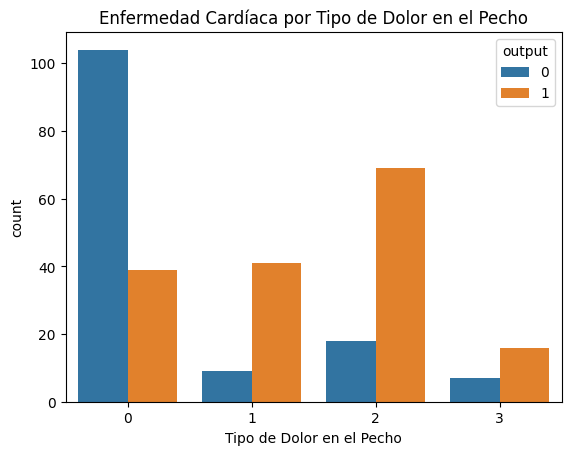

In [6]:
#gráfico de barras apiladas
sns.countplot(x='cp', hue='output', data=df)
plt.title('Enfermedad Cardíaca por Tipo de Dolor en el Pecho')
plt.xlabel('Tipo de Dolor en el Pecho')
plt.show()


#Test t-studen

Para determinar si hay diferencias significativas en las variables numéricas y grupos de variables categoricas

Estadístico t: -0.9864931536208362
Valor p: 0.3246834797221042
No hay evidencia significativa de diferencia en la presión arterial en reposo entre hombres y mujeres.
Estadístico t: -3.5029368327219244
Valor p: 0.000529966610622664
Hay una diferencia significativa en el colesterol entre hombres y mujeres.


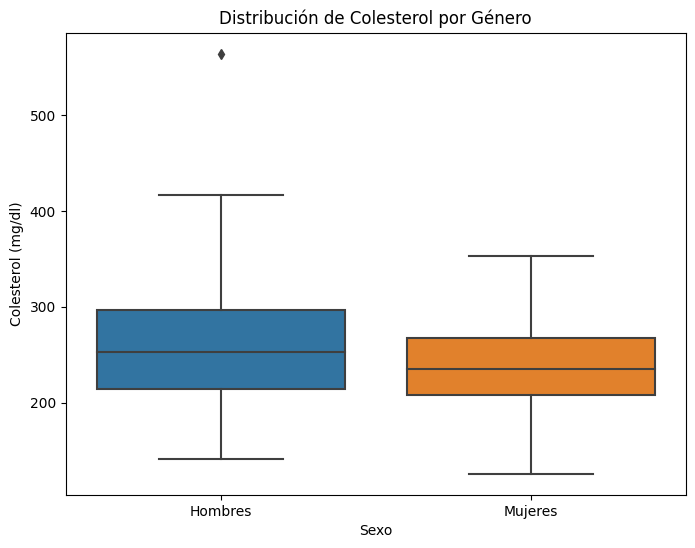

In [7]:
#diferencias presión arterial en reposo) entre los diferentes generos
#Separaro los datos de presión arterial para hombres y mujeres
presion_hombres = df[df['sex'] == 1]['trtbps']
presion_mujeres = df[df['sex'] == 0]['trtbps']

#t de Student para dos muestras independientes
t_stat, p_valor = stats.ttest_ind(presion_hombres, presion_mujeres)


print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

#Prueba
if p_valor < 0.05:
    print("Hay una diferencia significativa en la presión arterial en reposo entre hombres y mujeres.")
else:
    print("No hay evidencia significativa de diferencia en la presión arterial en reposo entre hombres y mujeres.")


#diferencias de colesterol entre los diferentes generos
#Separarolos datos de colesterol para hombres y mujeres
presion_hombres = df[df['sex'] == 1]['chol']
presion_mujeres = df[df['sex'] == 0]['chol']

#t de Student para dos muestras independientes
t_stat, p_valor = stats.ttest_ind(presion_hombres, presion_mujeres)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

# Prueba
if p_valor < 0.05:
    print("Hay una diferencia significativa en el colesterol entre hombres y mujeres.")
else:
    print("No hay evidencia significativa de diferencia en el colesterol entre hombres y mujeres.")

#boxplot entre colesterol y género
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='chol', data=df)
plt.xlabel('Sexo')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.title('Distribución de Colesterol por Género')
plt.show()